In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/Users/niharikadeokar/Desktop/ECOZE/unified_supermarket_data.csv")
df.head()

/var/folders/97/2wp359315j1fwr4xv957wy880000gn/T/ipykernel_28557/3996610927.py:1: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/Users/niharikadeokar/Desktop/ECOZE/unified_supermarket_data.csv")


,name,brand,price,image,description,department,aisle,shelf,recycling_info,ingredients,product_info,store,source_confidence
0,Cadbury Christmas Snow Cake Bar 5 Pack,NaN,NaN,https://digitalcontent.api.tesco.com/v2/media/...,Chocolate flavoured sponge with a white chocol...,Bakery,"Cakes, Cake Bars, Slices & Pies","Small Cakes, Bites & Slices",Film. Recycle with bags at large supermarket -...,NaN,NaN,Tesco,NaN
1,New York Bakery Bagel Thins The Original 4 Pack,NaN,£1.20,https://digitalcontent.api.tesco.com/v2/media/...,4 Original Bagel Thins\nFor more great recipes...,Bakery,Bread & Rolls,Bagels,NaN,NaN,NaN,Tesco,NaN
2,Tesco Finest 4 Buttermilk Pancakes,NaN,NaN,https://digitalcontent.api.tesco.com/v2/media/...,4 Buttermilk pancakes.\nLight & Fluffy Enriche...,Bakery,"Crumpets, Muffins & Pancakes",Pancakes,Card. Recycle Film. Recycle at large supermarket,NaN,NaN,Tesco,NaN
3,Mission Deli Wheat & White Wraps 6 Pack 367G,NaN,NaN,https://digitalcontent.api.tesco.com/v2/media/...,6 Wheat Flour Tortilla Wraps with Wholemeal Fl...,Bakery,"Wraps, Pittas, Naan & Thins",Wraps,NaN,NaN,NaN,Tesco,NaN
4,Tesco Multiseed Batch 800G,NaN,NaN,https://digitalcontent.api.tesco.com/v2/media/...,Medium sliced white loaf with mixed seeds.\nMe...,Bakery,Bread & Rolls,Seeded Bread,Bag. Recycle at large supermarket,NaN,NaN,Tesco,NaN


In [3]:
df = df[df['name'].notna()].copy()

df[['name']].head()

,name
0,Cadbury Christmas Snow Cake Bar 5 Pack
1,New York Bakery Bagel Thins The Original 4 Pack
2,Tesco Finest 4 Buttermilk Pancakes
3,Mission Deli Wheat & White Wraps 6 Pack 367G
4,Tesco Multiseed Batch 800G


In [4]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['name_clean'] = df['name'].apply(clean_text)


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=2, max_df=0.95)
X = vectorizer.fit_transform(df['name_clean'])

k = 10  
model = KMeans(n_clusters=k, random_state=42)
df['category_kmeans'] = model.fit_predict(X)

/Users/niharikadeokar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X.toarray())

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_2d[:, 0],
    y=X_2d[:, 1],
    hue=df['category_kmeans'],
    palette="tab10",
    legend="full"
)
plt.title("KMeans Clustering of Product Names")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

: 

In [1]:
!pip install sentence-transformers scikit-learn matplotlib seaborn

  Obtaining dependency information for sentence-transformers from https://files.pythonhosted.org/packages/6d/70/2b5b76e98191ec3b8b0d1dde52d00ddcc3806799149a9ce987b0d2d31015/sentence_transformers-5.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for transformers<5.0.0,>=4.41.0 from https://files.pythonhosted.org/packages/f5/be/79ef53e6a65795b40bfc2d11fa54a16abcb173f069e32005b8092c5d5c19/transformers-4.55.3-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 3.2 MB/s eta 0:00:00
  Obtaining dependency information for huggingface-hub>=0.20.0 from https://files.pythonhosted.org/packages/39/7b/bb06b061991107cd8783f300adff3e7b7f284e330fd82f507f2a1417b11d/huggingface_hub-0.34.4-py3-none-any.whl.metadata
  Obtaining dependency information for tokenizers<0.22,>=0.21 from https://files.pythonhosted.org/packages/8d/a6/28975479e35ddc751dc1ddc97b9b69bf7fcf074db31548aab37f8116674c/tokenizers-0.21.4-cp39-abi3-macosx_11_0_arm64.whl.metadata
  Obtaining

/var/folders/97/2wp359315j1fwr4xv957wy880000gn/T/ipykernel_28750/1351169753.py:5: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/niharikadeokar/Desktop/ECOZE/unified_supermarket_data.csv")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/2370 [00:00<?, ?it/s]

/Users/niharikadeokar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


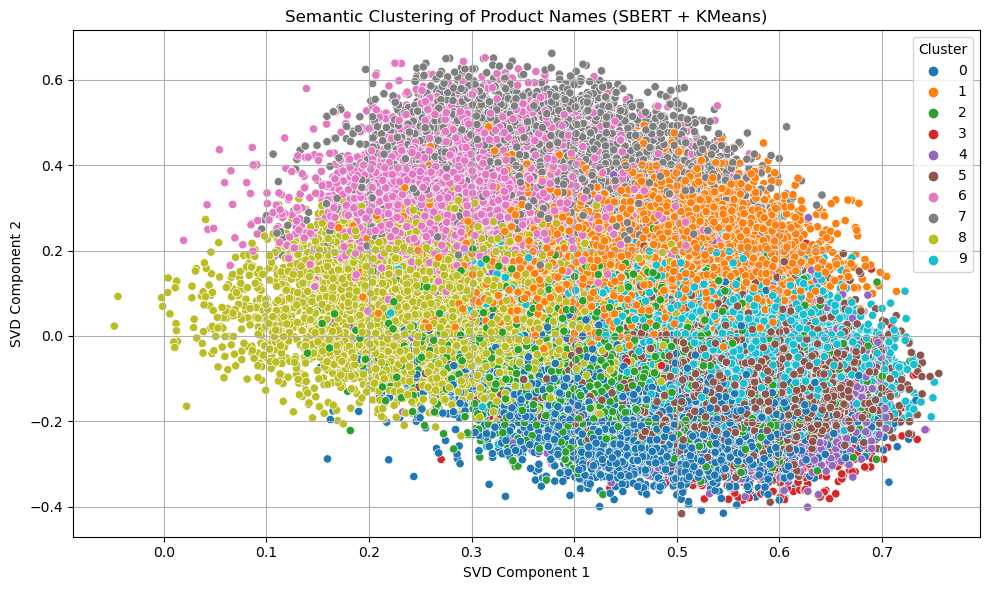

In [2]:
# --- 1. Load & clean ---
import pandas as pd
import re

df = pd.read_csv("/Users/niharikadeokar/Desktop/ECOZE/unified_supermarket_data.csv")
df = df[df['name'].notna()].copy()

def clean(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", " ", text)
    return re.sub(r"\s+", " ", text).strip()

df['name_clean'] = df['name'].apply(clean)

# --- 2. Sentence embeddings ---
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(df['name_clean'].tolist(), show_progress_bar=True)

# --- 3. KMeans clustering ---
from sklearn.cluster import KMeans

k = 10  # Number of categories
kmeans = KMeans(n_clusters=k, random_state=42)
df['sbert_cluster'] = kmeans.fit_predict(embeddings)

# --- 4. Visualise ---
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns

svd = TruncatedSVD(n_components=2, random_state=42)
X_2d = svd.fit_transform(embeddings)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=df['sbert_cluster'], palette='tab10', legend='full')
plt.title("Semantic Clustering of Product Names (SBERT + KMeans)")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [3]:
final=pd.read_csv("/Users/niharikadeokar/Desktop/ECOZE/unified_final_ecoze.csv")
final.head()

/var/folders/97/2wp359315j1fwr4xv957wy880000gn/T/ipykernel_28750/1333585605.py:1: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  final=pd.read_csv("/Users/niharikadeokar/Desktop/ECOZE/unified_final_ecoze.csv")


,name,brand,price,image,description,department,aisle,shelf,recycling_info,ingredients,product_info,store,source_confidence,tesco_department,ecoze_category
0,Cadbury Christmas Snow Cake Bar 5 Pack,NaN,NaN,https://digitalcontent.api.tesco.com/v2/media/...,Chocolate flavoured sponge with a white chocol...,Bakery,"Cakes, Cake Bars, Slices & Pies","Small Cakes, Bites & Slices",Film. Recycle with bags at large supermarket -...,NaN,NaN,Tesco,NaN,Bakery,Food
1,New York Bakery Bagel Thins The Original 4 Pack,NaN,£1.20,https://digitalcontent.api.tesco.com/v2/media/...,4 Original Bagel Thins\nFor more great recipes...,Bakery,Bread & Rolls,Bagels,NaN,NaN,NaN,Tesco,NaN,Bakery,Food
2,Tesco Finest 4 Buttermilk Pancakes,NaN,NaN,https://digitalcontent.api.tesco.com/v2/media/...,4 Buttermilk pancakes.\nLight & Fluffy Enriche...,Bakery,"Crumpets, Muffins & Pancakes",Pancakes,Card. Recycle Film. Recycle at large supermarket,NaN,NaN,Tesco,NaN,Bakery,Food
3,Mission Deli Wheat & White Wraps 6 Pack 367G,NaN,NaN,https://digitalcontent.api.tesco.com/v2/media/...,6 Wheat Flour Tortilla Wraps with Wholemeal Fl...,Bakery,"Wraps, Pittas, Naan & Thins",Wraps,NaN,NaN,NaN,Tesco,NaN,Bakery,Food
4,Tesco Multiseed Batch 800G,NaN,NaN,https://digitalcontent.api.tesco.com/v2/media/...,Medium sliced white loaf with mixed seeds.\nMe...,Bakery,Bread & Rolls,Seeded Bread,Bag. Recycle at large supermarket,NaN,NaN,Tesco,NaN,Bakery,Food


In [4]:
final = final.drop('brand', axis=1)
final.head()

,name,price,image,description,department,aisle,shelf,recycling_info,ingredients,product_info,store,source_confidence,tesco_department,ecoze_category
0,Cadbury Christmas Snow Cake Bar 5 Pack,NaN,https://digitalcontent.api.tesco.com/v2/media/...,Chocolate flavoured sponge with a white chocol...,Bakery,"Cakes, Cake Bars, Slices & Pies","Small Cakes, Bites & Slices",Film. Recycle with bags at large supermarket -...,NaN,NaN,Tesco,NaN,Bakery,Food
1,New York Bakery Bagel Thins The Original 4 Pack,£1.20,https://digitalcontent.api.tesco.com/v2/media/...,4 Original Bagel Thins\nFor more great recipes...,Bakery,Bread & Rolls,Bagels,NaN,NaN,NaN,Tesco,NaN,Bakery,Food
2,Tesco Finest 4 Buttermilk Pancakes,NaN,https://digitalcontent.api.tesco.com/v2/media/...,4 Buttermilk pancakes.\nLight & Fluffy Enriche...,Bakery,"Crumpets, Muffins & Pancakes",Pancakes,Card. Recycle Film. Recycle at large supermarket,NaN,NaN,Tesco,NaN,Bakery,Food
3,Mission Deli Wheat & White Wraps 6 Pack 367G,NaN,https://digitalcontent.api.tesco.com/v2/media/...,6 Wheat Flour Tortilla Wraps with Wholemeal Fl...,Bakery,"Wraps, Pittas, Naan & Thins",Wraps,NaN,NaN,NaN,Tesco,NaN,Bakery,Food
4,Tesco Multiseed Batch 800G,NaN,https://digitalcontent.api.tesco.com/v2/media/...,Medium sliced white loaf with mixed seeds.\nMe...,Bakery,Bread & Rolls,Seeded Bread,Bag. Recycle at large supermarket,NaN,NaN,Tesco,NaN,Bakery,Food


In [5]:
final = final.drop('price', axis=1)
final.head()

,name,image,description,department,aisle,shelf,recycling_info,ingredients,product_info,store,source_confidence,tesco_department,ecoze_category
0,Cadbury Christmas Snow Cake Bar 5 Pack,https://digitalcontent.api.tesco.com/v2/media/...,Chocolate flavoured sponge with a white chocol...,Bakery,"Cakes, Cake Bars, Slices & Pies","Small Cakes, Bites & Slices",Film. Recycle with bags at large supermarket -...,NaN,NaN,Tesco,NaN,Bakery,Food
1,New York Bakery Bagel Thins The Original 4 Pack,https://digitalcontent.api.tesco.com/v2/media/...,4 Original Bagel Thins\nFor more great recipes...,Bakery,Bread & Rolls,Bagels,NaN,NaN,NaN,Tesco,NaN,Bakery,Food
2,Tesco Finest 4 Buttermilk Pancakes,https://digitalcontent.api.tesco.com/v2/media/...,4 Buttermilk pancakes.\nLight & Fluffy Enriche...,Bakery,"Crumpets, Muffins & Pancakes",Pancakes,Card. Recycle Film. Recycle at large supermarket,NaN,NaN,Tesco,NaN,Bakery,Food
3,Mission Deli Wheat & White Wraps 6 Pack 367G,https://digitalcontent.api.tesco.com/v2/media/...,6 Wheat Flour Tortilla Wraps with Wholemeal Fl...,Bakery,"Wraps, Pittas, Naan & Thins",Wraps,NaN,NaN,NaN,Tesco,NaN,Bakery,Food
4,Tesco Multiseed Batch 800G,https://digitalcontent.api.tesco.com/v2/media/...,Medium sliced white loaf with mixed seeds.\nMe...,Bakery,Bread & Rolls,Seeded Bread,Bag. Recycle at large supermarket,NaN,NaN,Tesco,NaN,Bakery,Food


In [6]:
final = final.drop('ingredients', axis=1)
final.head()

,name,image,description,department,aisle,shelf,recycling_info,product_info,store,source_confidence,tesco_department,ecoze_category
0,Cadbury Christmas Snow Cake Bar 5 Pack,https://digitalcontent.api.tesco.com/v2/media/...,Chocolate flavoured sponge with a white chocol...,Bakery,"Cakes, Cake Bars, Slices & Pies","Small Cakes, Bites & Slices",Film. Recycle with bags at large supermarket -...,NaN,Tesco,NaN,Bakery,Food
1,New York Bakery Bagel Thins The Original 4 Pack,https://digitalcontent.api.tesco.com/v2/media/...,4 Original Bagel Thins\nFor more great recipes...,Bakery,Bread & Rolls,Bagels,NaN,NaN,Tesco,NaN,Bakery,Food
2,Tesco Finest 4 Buttermilk Pancakes,https://digitalcontent.api.tesco.com/v2/media/...,4 Buttermilk pancakes.\nLight & Fluffy Enriche...,Bakery,"Crumpets, Muffins & Pancakes",Pancakes,Card. Recycle Film. Recycle at large supermarket,NaN,Tesco,NaN,Bakery,Food
3,Mission Deli Wheat & White Wraps 6 Pack 367G,https://digitalcontent.api.tesco.com/v2/media/...,6 Wheat Flour Tortilla Wraps with Wholemeal Fl...,Bakery,"Wraps, Pittas, Naan & Thins",Wraps,NaN,NaN,Tesco,NaN,Bakery,Food
4,Tesco Multiseed Batch 800G,https://digitalcontent.api.tesco.com/v2/media/...,Medium sliced white loaf with mixed seeds.\nMe...,Bakery,Bread & Rolls,Seeded Bread,Bag. Recycle at large supermarket,NaN,Tesco,NaN,Bakery,Food


In [7]:
final = final.drop('source_confidence', axis=1)
final.head()

,name,image,description,department,aisle,shelf,recycling_info,product_info,store,tesco_department,ecoze_category
0,Cadbury Christmas Snow Cake Bar 5 Pack,https://digitalcontent.api.tesco.com/v2/media/...,Chocolate flavoured sponge with a white chocol...,Bakery,"Cakes, Cake Bars, Slices & Pies","Small Cakes, Bites & Slices",Film. Recycle with bags at large supermarket -...,NaN,Tesco,Bakery,Food
1,New York Bakery Bagel Thins The Original 4 Pack,https://digitalcontent.api.tesco.com/v2/media/...,4 Original Bagel Thins\nFor more great recipes...,Bakery,Bread & Rolls,Bagels,NaN,NaN,Tesco,Bakery,Food
2,Tesco Finest 4 Buttermilk Pancakes,https://digitalcontent.api.tesco.com/v2/media/...,4 Buttermilk pancakes.\nLight & Fluffy Enriche...,Bakery,"Crumpets, Muffins & Pancakes",Pancakes,Card. Recycle Film. Recycle at large supermarket,NaN,Tesco,Bakery,Food
3,Mission Deli Wheat & White Wraps 6 Pack 367G,https://digitalcontent.api.tesco.com/v2/media/...,6 Wheat Flour Tortilla Wraps with Wholemeal Fl...,Bakery,"Wraps, Pittas, Naan & Thins",Wraps,NaN,NaN,Tesco,Bakery,Food
4,Tesco Multiseed Batch 800G,https://digitalcontent.api.tesco.com/v2/media/...,Medium sliced white loaf with mixed seeds.\nMe...,Bakery,Bread & Rolls,Seeded Bread,Bag. Recycle at large supermarket,NaN,Tesco,Bakery,Food


In [8]:
final = final.drop('image', axis=1)
final.head()

,name,description,department,aisle,shelf,recycling_info,product_info,store,tesco_department,ecoze_category
0,Cadbury Christmas Snow Cake Bar 5 Pack,Chocolate flavoured sponge with a white chocol...,Bakery,"Cakes, Cake Bars, Slices & Pies","Small Cakes, Bites & Slices",Film. Recycle with bags at large supermarket -...,NaN,Tesco,Bakery,Food
1,New York Bakery Bagel Thins The Original 4 Pack,4 Original Bagel Thins\nFor more great recipes...,Bakery,Bread & Rolls,Bagels,NaN,NaN,Tesco,Bakery,Food
2,Tesco Finest 4 Buttermilk Pancakes,4 Buttermilk pancakes.\nLight & Fluffy Enriche...,Bakery,"Crumpets, Muffins & Pancakes",Pancakes,Card. Recycle Film. Recycle at large supermarket,NaN,Tesco,Bakery,Food
3,Mission Deli Wheat & White Wraps 6 Pack 367G,6 Wheat Flour Tortilla Wraps with Wholemeal Fl...,Bakery,"Wraps, Pittas, Naan & Thins",Wraps,NaN,NaN,Tesco,Bakery,Food
4,Tesco Multiseed Batch 800G,Medium sliced white loaf with mixed seeds.\nMe...,Bakery,Bread & Rolls,Seeded Bread,Bag. Recycle at large supermarket,NaN,Tesco,Bakery,Food


In [10]:
final.sample(5)

,name,description,department,aisle,shelf,recycling_info,product_info,store,tesco_department,ecoze_category
33125,"Sainsbury's White Closed Cup Mushrooms, SO Org...",NaN,Dietary & world foods,Organic,All organic,NaN,NaN,Sainsbury's,Food Cupboard,Haircare & Styling
32792,Elsinore Mediterranean Fish Soup,"A Mediterranean Style Soup with Pollock, Seafo...",Food Cupboard,"Tins, Cans & Packets",Soup,NaN,NaN,Waitrose,Food Cupboard,Food
47078,L'Oréal Paris Matte Resistance Nude Attitude 6...,\n\nLongwear liquid lipstickUltra-lightweightI...,Beauty & cosmetics,Make up,All,Country of origin: France,NaN,Sainsbury's,Health & Beauty,Non-Alcoholic Cold Drinks
65679,Kids’ Lawnmower - Superman,Fun garden toy featuring favourite characters ...,"Baby, Child & Toys",Toys,NaN,NaN,NaN,Lidl,Baby & Toddler,NaN
13208,Alpro Coconut No Sugar Long Life Dairy Free Dr...,Coconut drink with added calcium and vitamins....,Fresh Food,Dairy Free & Dairy Alternatives,Dairy Free Drinks,NaN,NaN,Tesco,Fresh Food,Food


In [11]:
final = final[final['store'].str.lower() != 'morrisons'].copy()

food_df = final[final['ecoze_category'] == 'Food'].copy()

food_df = food_df.dropna(subset=['department', 'aisle', 'shelf'], how='all').copy()

def combine_features(row):
    return " | ".join([
        str(row.get("department", "")),
        str(row.get("aisle", "")),
        str(row.get("shelf", ""))
    ]).lower()

food_df['input_text'] = food_df.apply(combine_features, axis=1)

food_df[['name', 'input_text']].head()


,name,input_text
0,Cadbury Christmas Snow Cake Bar 5 Pack,"bakery | cakes, cake bars, slices & pies | sma..."
1,New York Bakery Bagel Thins The Original 4 Pack,bakery | bread & rolls | bagels
2,Tesco Finest 4 Buttermilk Pancakes,"bakery | crumpets, muffins & pancakes | pancakes"
3,Mission Deli Wheat & White Wraps 6 Pack 367G,"bakery | wraps, pittas, naan & thins | wraps"
4,Tesco Multiseed Batch 800G,bakery | bread & rolls | seeded bread


In [12]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-roberta-large-v1") 

embeddings = model.encode(food_df['input_text'].tolist(), show_progress_bar=True)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/650 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

Batches:   0%|          | 0/1104 [00:00<?, ?it/s]

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
for k in range(5, 21):
    km = KMeans(n_clusters=k, random_state=42).fit(embeddings)
    score = silhouette_score(embeddings, km.labels_)
    scores.append((k, score))

best_k, best_score = max(scores, key=lambda x: x[1])
print(f"Best K: {best_k}, Silhouette: {best_score:.3f}")

final_model = KMeans(n_clusters=best_k, random_state=42).fit(embeddings)
food_df['sub_category'] = final_model.labels_

/Users/niharikadeokar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/niharikadeokar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/niharikadeokar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/niharikadeokar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default 

Best K: 18, Silhouette: 0.173


/Users/niharikadeokar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
subcat_summary = food_df.groupby('sub_category')['name'].count().reset_index()
subcat_summary.columns = ['sub_category', 'product_count']

print("📊 Sub-category Summary:")
print(subcat_summary.to_markdown(index=False))  # prettier table

📊 Sub-category Summary:
|   sub_category |   product_count |
|---------------:|----------------:|
|              0 |            2403 |
|              1 |            2584 |
|              2 |            2150 |
|              3 |            4346 |
|              4 |            2842 |
|              5 |            1807 |
|              6 |            2166 |
|              7 |            1579 |
|              8 |            1404 |
|              9 |             644 |
|             10 |             570 |
|             11 |            3127 |
|             12 |            1618 |
|             13 |            2481 |
|             14 |            1145 |
|             15 |            1022 |
|             16 |            1904 |
|             17 |            1492 |


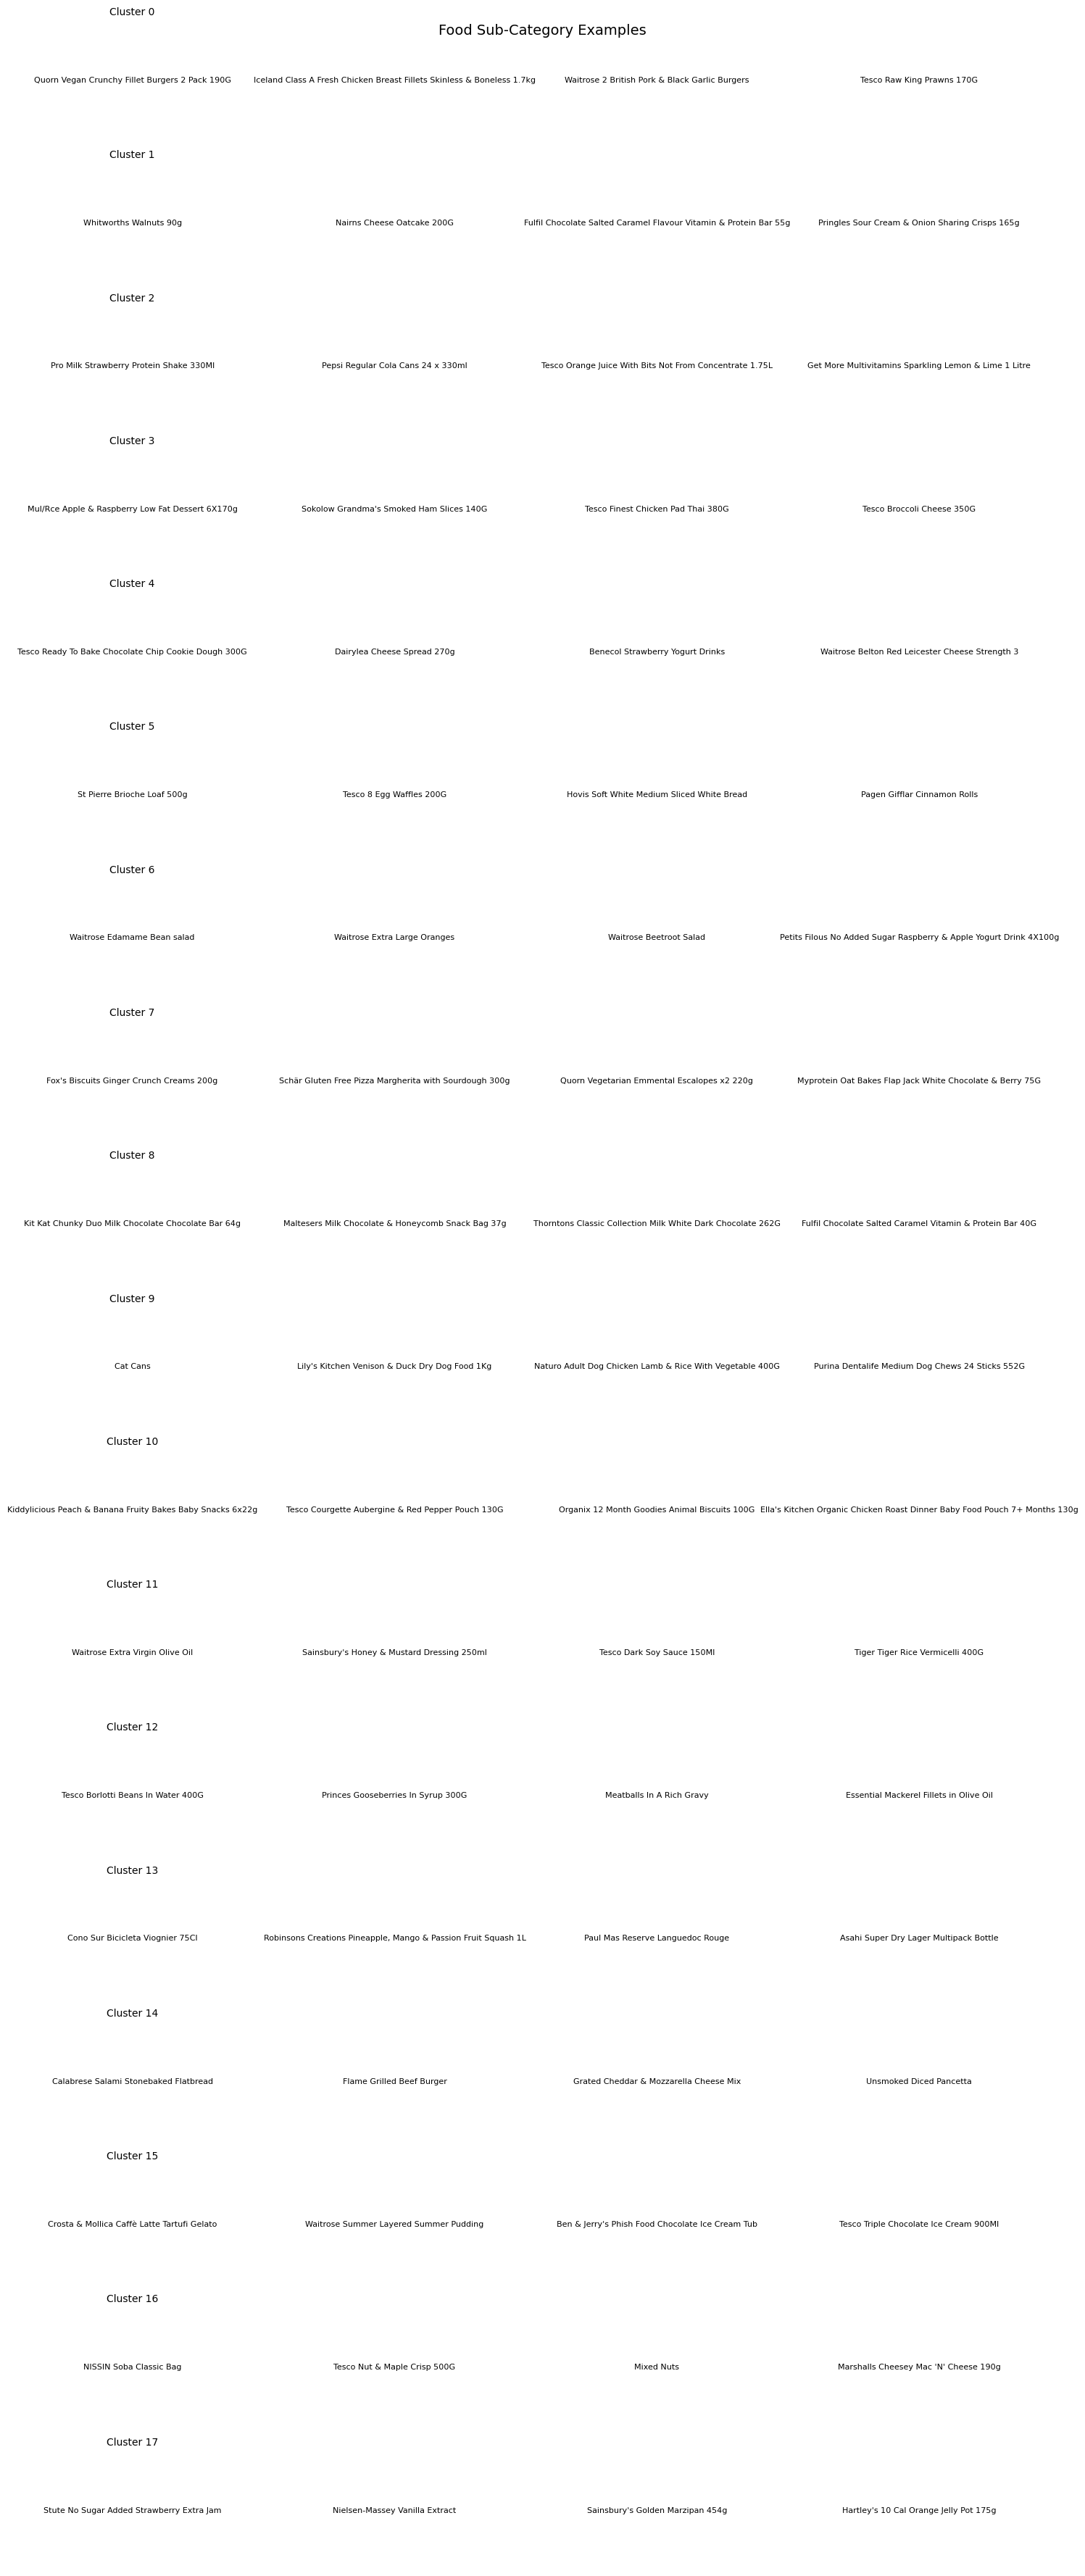

In [16]:
import matplotlib.pyplot as plt
import math

clusters = food_df['sub_category'].unique()
samples_per_cluster = 4
total = len(clusters) * samples_per_cluster

plt.figure(figsize=(15, len(clusters) * 2))

for i, cluster in enumerate(sorted(clusters)):
    cluster_items = food_df[food_df['sub_category'] == cluster].sample(samples_per_cluster, random_state=42)
    for j, (_, row) in enumerate(cluster_items.iterrows()):
        plt_idx = i * samples_per_cluster + j + 1
        plt.subplot(len(clusters), samples_per_cluster, plt_idx)
        plt.text(0.5, 0.5, row['name'], ha='center', va='center', wrap=True, fontsize=8)
        plt.axis('off')
        if j == 0:
            plt.title(f"Cluster {cluster}", fontsize=10)

plt.suptitle("Food Sub-Category Examples", fontsize=14)
plt.tight_layout()
plt.show()

In [17]:
cluster_labels = {
    0: "Meat & Alternatives",
    1: "Snacks & Dairy",
    2: "Drinks & Juices",
    3: "Ready Meals",
    4: "Desserts & Spreads",
    5: "Breads & Breakfast Bakery",
    6: "Salads & Produce",
    7: "Bakery & Baked Goods",
    8: "Confectionery",
    9: "Pet Food",
    10: "Baby Food",
    11: "Cooking Oils & Sauces",
    12: "Canned & Preserved Foods",
    13: "Beverages (Alcoholic/Non)",
    14: "Deli & Charcuterie",
    15: "Frozen Desserts",
    16: "Instant Meals & Snacks",
    17: "Baking Ingredients & Preserves"
}

food_df['sub_category_label'] = food_df['sub_category'].map(cluster_labels)

In [19]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35304 entries, 0 to 75899
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                35284 non-null  object
 1   description         30134 non-null  object
 2   department          35267 non-null  object
 3   aisle               32312 non-null  object
 4   shelf               35304 non-null  object
 5   recycling_info      12776 non-null  object
 6   product_info        0 non-null      object
 7   store               35304 non-null  object
 8   tesco_department    32624 non-null  object
 9   ecoze_category      35304 non-null  object
 10  input_text          35304 non-null  object
 11  sub_category        35304 non-null  int32 
 12  sub_category_label  35304 non-null  object
dtypes: int32(1), object(12)
memory usage: 3.6+ MB


In [25]:
food_df.sample(5)

,name,description,department,aisle,shelf,recycling_info,product_info,store,tesco_department,ecoze_category,input_text,sub_category,sub_category_label
73689,Malt Vinegar,NaN,Food Cupboard,NaN,"Sauces, Oils & Dressings",NaN,NaN,Aldi,Food Cupboard,Food,"food cupboard | nan | sauces, oils & dressings",11,Cooking Oils & Sauces
70754,Mr Kipling Manor House Cake 390g,"IngredientsWheat Flour (with added Calcium, Ir...",Bakery,Cakes,Muffins & Mini Bites,NaN,NaN,Iceland,Bakery,Food,bakery | cakes | muffins & mini bites,5,Breads & Breakfast Bakery
33764,Ella's Kitchen Organic Spag Bol with Cheese Ba...,\n\nChunky + Lumpy\n\nEveryday faves\n\nLip sm...,Baby & toddler,Baby meals,All baby meals,Pouch,NaN,Sainsbury's,NaN,Food,baby & toddler | baby meals | all baby meals,10,Baby Food
8620,Tesco Supersweet Mini Corn On The Cob 875G,Mini corn on the cob.\nCut & trimmed Frozen wi...,Frozen Food,Vegetables,"Peas, Sweetcorn & Green Beans",Film. Recycle at large supermarket,NaN,Tesco,Frozen Food,Food,"frozen food | vegetables | peas, sweetcorn & g...",0,Meat & Alternatives
4517,Schwartz Chilli Con Carne Recipe Mix 41g,"A spicy recipe mix with vibrant chilli powder,...",Food Cupboard,Cooking Ingredients,"Packet Sauces, Mixes & Cook in a Bag",Pack. Recycle,NaN,Tesco,Food Cupboard,Food,food cupboard | cooking ingredients | packet s...,11,Cooking Oils & Sauces


/var/folders/97/2wp359315j1fwr4xv957wy880000gn/T/ipykernel_28750/3090322823.py:15: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
/Users/niharikadeokar/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


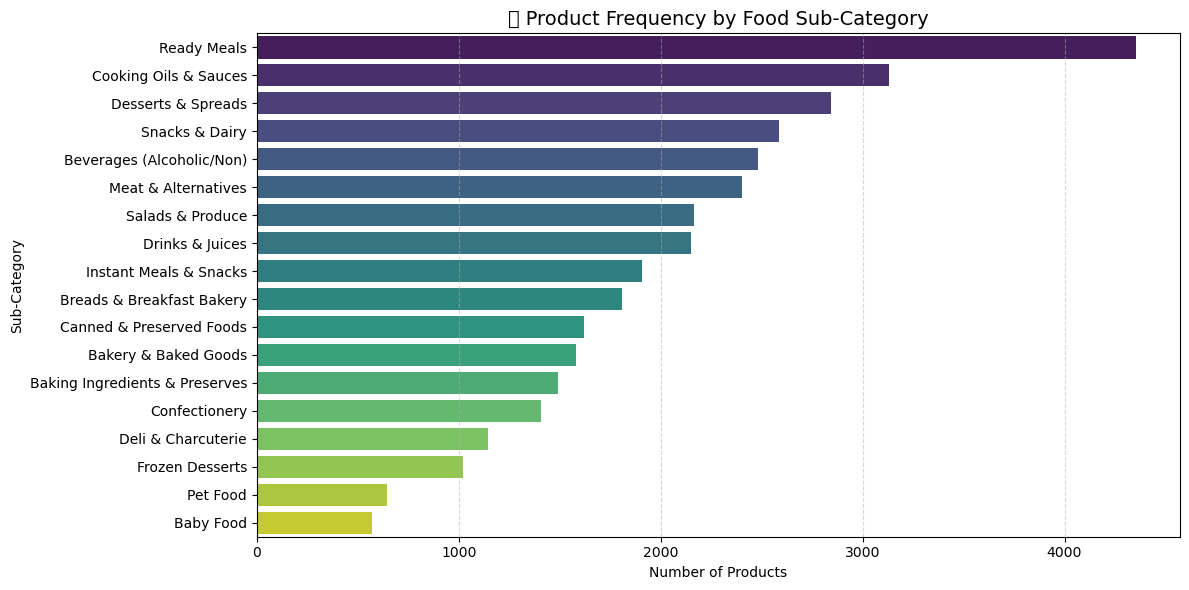

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

subcat_counts = food['sub_category_label'].value_counts().reset_index()
subcat_counts.columns = ['Sub-Category', 'Product Count']

subcat_counts = subcat_counts.sort_values('Product Count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=subcat_counts, y='Sub-Category', x='Product Count', palette='viridis')

plt.title("📦 Product Frequency by Food Sub-Category", fontsize=14)
plt.xlabel("Number of Products")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

/var/folders/97/2wp359315j1fwr4xv957wy880000gn/T/ipykernel_28750/1668141642.py:33: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/var/folders/97/2wp359315j1fwr4xv957wy880000gn/T/ipykernel_28750/1668141642.py:33: UserWarning: Glyph 127869 (\N{FORK AND KNIFE WITH PLATE}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/Users/niharikadeokar/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/niharikadeokar/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127869 (\N{FORK AND KNIFE WITH PLATE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


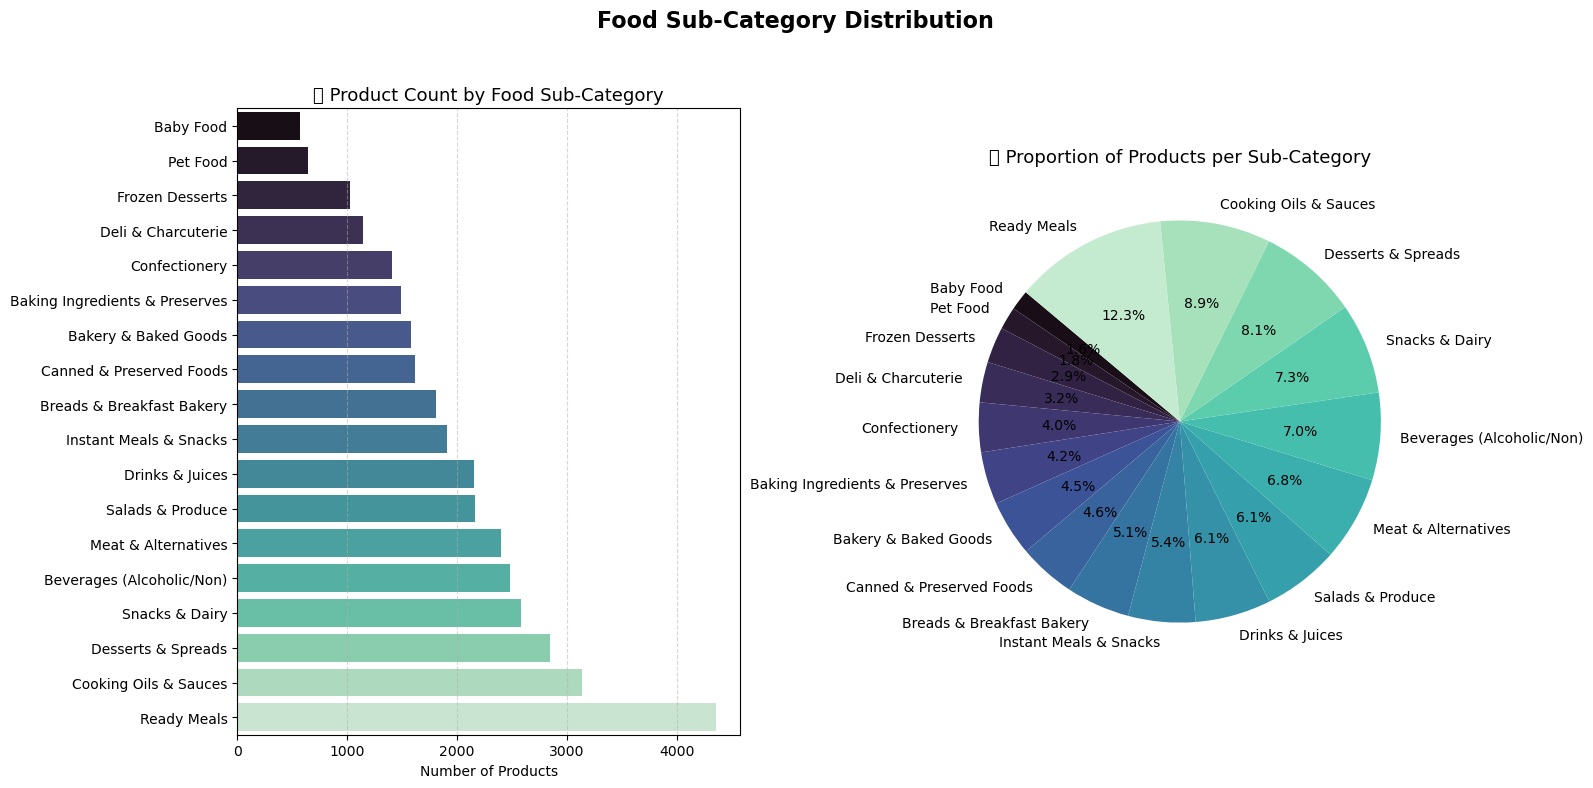

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

subcat_counts = food_df['sub_category_label'].value_counts().reset_index()
subcat_counts.columns = ['Sub-Category', 'Product Count']

subcat_counts = subcat_counts.sort_values('Product Count', ascending=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.barplot(
    data=subcat_counts,
    y='Sub-Category',
    x='Product Count',
    palette='mako',
    ax=axes[0]
)
axes[0].set_title("📦 Product Count by Food Sub-Category", fontsize=13)
axes[0].set_xlabel("Number of Products")
axes[0].set_ylabel("")
axes[0].grid(axis='x', linestyle='--', alpha=0.5)

axes[1].pie(
    subcat_counts['Product Count'],
    labels=subcat_counts['Sub-Category'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('mako', len(subcat_counts))
)
axes[1].set_title("🍽️ Proportion of Products per Sub-Category", fontsize=13)

plt.suptitle("Food Sub-Category Distribution", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

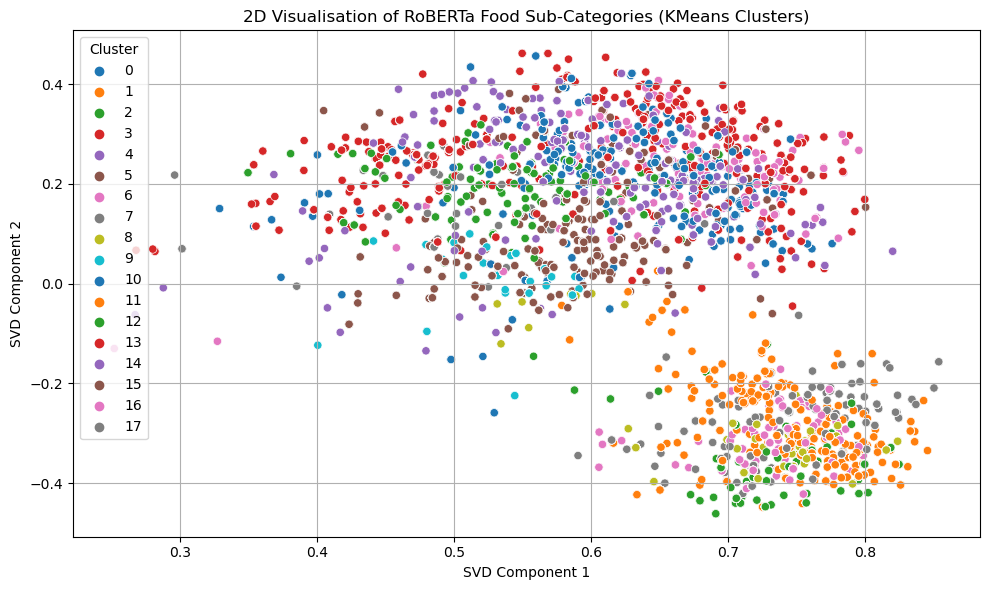

In [27]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2, random_state=42)
X_2d = svd.fit_transform(embeddings)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=food_df['sub_category'], palette='tab10', legend='full')
plt.title("2D Visualisation of RoBERTa Food Sub-Categories (KMeans Clusters)")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()